In [1]:
from itertools import islice
from random import random
import time
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

from matplotlib import interactive
import datetime as dt
interactive(True)

In [ ]:
#file for functions to do my live plotting.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
# use ggplot style for more sophisticated visuals

plt.style.use('ggplot')

#custom pause function that doesn't force the window back into the foreground.
def mypause(interval):
    backend = plt.rcParams['backend']
    if backend in matplotlib.rcsetup.interactive_bk:
        figManager = matplotlib._pylab_helpers.Gcf.get_active()
        if figManager is not None:
            canvas = figManager.canvas
            if canvas.figure.stale:
                canvas.draw()
            canvas.start_event_loop(interval)
            return


def live_plotter(x_vec,y1_data,line1,identifier='',pause_time=0.016, figure = None ):        
    if line1==[]:
        # this is the call to matplotlib that allows dynamic plotting
        plt.ion()        
        if type(figure) is not matplotlib.figure.Figure:    #check to determine if a figure is handed to the function. if so, use it, else make one.
            fig = plt.figure(figsize=(13,6))              
            print("no figure")
        else:
            fig = figure
            print("provided figure")
        ax = fig.add_subplot(111)
        # create a variable for the line so we can later update it
        line1, = ax.plot(x_vec,y1_data,'-o',alpha=0.8)        
        #update plot label/title
        plt.ylabel('Y Label')
        plt.title('Title: {}'.format(identifier))       
        plt.show()
            
    # after the figure, axis, and line are created, we only need to update the y-data
    line1.set_ydata(y1_data)
    # adjust limits if new data goes beyond bounds
    if np.min(y1_data)<=line1.axes.get_ylim()[0] or np.max(y1_data)>=line1.axes.get_ylim()[1]:
        plt.ylim([np.min(y1_data)-np.std(y1_data),np.max(y1_data)+np.std(y1_data)])
    # this pauses the data so the figure/axis can catch up - the amount of pause can be altered above
    #plt.pause(pause_time)
    mypause(pause_time)   
    
    # return line so we can update it again in the next iteration
    return line1

    0      1        2    3    4    5    6    7    8    9   ...   20   21   22  \
0  0.0  215.0  45076.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  162.0   4528.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
2  0.0  236.0   1228.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  2.0  1.0  0.0   
3  0.0  233.0   2032.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  3.0  1.0  0.0   
4  0.0  239.0    486.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  1.0  0.0   

     23   24   25   26   27   28  29  
0  0.00  0.0  0.0  0.0  0.0  0.0   n  
1  1.00  0.0  0.0  0.0  0.0  0.0   n  
2  0.50  0.0  0.0  0.0  0.0  0.0   n  
3  0.33  0.0  0.0  0.0  0.0  0.0   n  
4  0.25  0.0  0.0  0.0  0.0  0.0   n  

[5 rows x 30 columns]
{'n': 0, 'o': 1}
    0      1        2    3    4    5    6    7    8    9   ...   20   21   22  \
0  0.0  215.0  45076.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  162.0   4528.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0

C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:32: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.


1
2
3
4


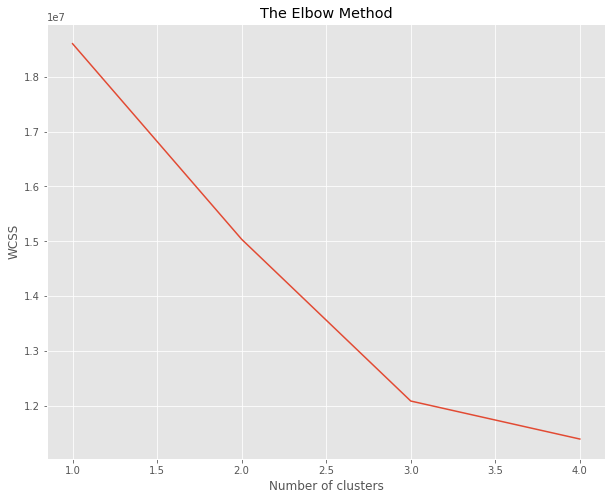

done


In [13]:
count = 0
inputFile =[]
CSVfileName ="datasets/kdd99-unsupervised-ad.csv"
MAXROWS = 100
# with open(CSVfileName, "r", newline='') as csvfile:
#     for row in csvfile:
#         if MAXROWS > 0 and count >= MAXROWS:
#            break
#         count= count + 1
#         inputFile.append(row.encode('utf-8'))
#         print('currently reading {}  rows \r'.format(count), end ="")
#     csvfile.close()
#     print("total rows counted:{}".format(count))

#     string_length = len(inputFile)
    #print("inputCount: {}".format(cppProcess.getCurrentInputCount()))
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
#     neigh = KNeighborsClassifier(n_neighbors=3)
#     neigh.fit(X, y)
    
    #sent = cppProcess.initReaders(inputFile)
    #print("initReader {}".format(sent))
df = pd.read_csv(CSVfileName, header=None)
print(df.head())
mapping = {k: v for v, k in enumerate(df.iloc[:,29].unique())}
print(mapping)
df.iloc[:,29] = df.iloc[:,29].map(mapping)
print(df.head())
#standardize the data to normal distribution
from sklearn import preprocessing
dataset1_standardized = preprocessing.scale(df)
dataset1_standardized = pd.DataFrame(dataset1_standardized)

plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
    print(i)
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
    #print(cppProcess.checkComplete())
#     count =0
#     size = 100
#     x_vec = np.linspace(0,1,size+1)[0:-1]
#     #y_vec = np.random.randn(len(x_vec))
#     #x_vec = np.zeros(shape=(1,1))
#     y_vec = np.zeros(shape=(100,1))
#     line1 = []
#     fig=plt.figure(figsize=(13,6))
#     counter = 0
#     while  counter <= 1000:            
#         counter = counter +1
#         #print('currently processed {} lines...\r'.format(cppProcess.getResultsCount()), end ="")                      
#         y_vec[-1] = np.random.randn(1)
#         #y_vec[-1] = cppProcess.getResultsCount()
#         line1 = live_plotter(x_vec,y_vec,line1, figure=fig)
#         y_vec = np.append(y_vec[1:],0.0)
print("done")

In [39]:
    # Fitting K-Means to the dataset
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(dataset1_standardized)
    #beginning of  the cluster numbering with 1 instead of 0
    y_kmeans1=y_kmeans
    y_kmeans1=y_kmeans+1
    # New Dataframe called cluster
    cluster = pd.DataFrame(y_kmeans1)
    # Adding cluster to the Dataset1
    df['cluster'] = cluster
    #Mean of clusters
    kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
    kmeans_mean_cluster

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
cluster,,,,,,,,,,,,,,,,,,,,,
1,0.6,306.6,4488.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,248.2,1.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.6,0.1,0.1,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.8,5.3,14.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,207.3,1.0,0.0,0.3,0.1,0.0,0.0,1.0,0.9,0.0


In [43]:
df.groupby('cluster').count()

#len(df.index)
#rowCount = range(0,len(df.index))

#ax1 = df.plot.scatter(x=2, y = 'cluster')

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
cluster,,,,,,,,,,,,,,,,,,,,,
1,566162,566162,566162,566162,566162,566162,566162,566162,566162,566162,...,566162,566162,566162,566162,566162,566162,566162,566162,566162,566162
2,499,499,499,499,499,499,499,499,499,499,...,499,499,499,499,499,499,499,499,499,499
3,53437,53437,53437,53437,53437,53437,53437,53437,53437,53437,...,53437,53437,53437,53437,53437,53437,53437,53437,53437,53437


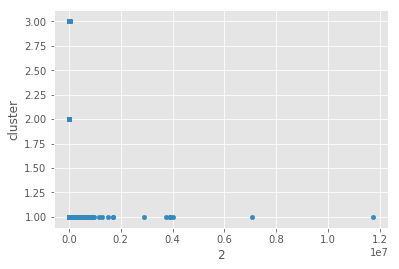

In [44]:
ax1 = df.plot.scatter(x=2, y = 'cluster')

In [8]:
import pandas as pd
data = pd.read_csv("./datasets/kdd99-unsupervised-ad.csv", header = None)
data2 = pd.read_csv("./datasets/kddcup_data_10_percent_corrected.csv", header = None, nrows = 1000)
print(data.head())
print(data2.head())



    0      1        2    3    4    5    6    7    8    9   ...   20   21   22  \
0  0.0  215.0  45076.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  162.0   4528.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0   
2  0.0  236.0   1228.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  2.0  1.0  0.0   
3  0.0  233.0   2032.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  3.0  1.0  0.0   
4  0.0  239.0    486.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  1.0  0.0   

     23   24   25   26   27   28  29  
0  0.00  0.0  0.0  0.0  0.0  0.0   n  
1  1.00  0.0  0.0  0.0  0.0  0.0   n  
2  0.50  0.0  0.0  0.0  0.0  0.0   n  
3  0.33  0.0  0.0  0.0  0.0  0.0   n  
4  0.25  0.0  0.0  0.0  0.0  0.0   n  

[5 rows x 30 columns]
   0    1     2   3    4     5   6   7   8   9   ...  32   33   34    35   36  \
0   0  tcp  http  SF  181  5450   0   0   0   0  ...   9  1.0  0.0  0.11  0.0   
1   0  tcp  http  SF  239   486   0   0   0   0  ...  19  1.0  0.0  0.05  0.0   
2   0  tcp  h

In [9]:
df = data2.loc[:,41].unique()
print(df) 

['normal.' 'buffer_overflow.']


In [10]:
df = data2.groupby(41).count()
results = df[0].sort_values(ascending=False)
results = results / len(data2.index) * 100
print(results)

41
normal.             99.8
buffer_overflow.     0.2
Name: 0, dtype: float64


In [11]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
labels = (data2.loc[:,41])
le.fit(labels)
print("classes of labels are:{}".format(le.classes_))
labels_normalized = le.transform(labels)




classes of labels are:['buffer_overflow.' 'normal.']


In [15]:
inputFile_strings = data2.to_csv(header=None, index=False).strip('\n').split('\n')
print(inputFile_strings[0])

0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.


In [16]:
inputFile_strings2 = data2.astype(str).values.tolist()

In [17]:
print(inputFile_strings2[0])

['0', 'tcp', 'http', 'SF', '181', '5450', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '9', '9', '1.0', '0.0', '0.11', '0.0', '0.0', '0.0', '0.0', '0.0', 'normal.']


In [44]:
output = []
for i in inputFile_strings:    
    output.append(i.split(','))
#input = np.reshape(inputFile_strings, (-1,1))  
#input = input.split(',')
#input  = pd.read_csv(inputFile_strings, index_col = 0, parse_dates= True, header = None, sep=',')    
df  = pd.DataFrame(output)
print(df)

     0    1     2   3    4      5  6  7  8   9   ...   32    33    34    35  \
0     0  tcp  http  SF  181   5450  0  0  0   0  ...    9   1.0   0.0  0.11   
1     0  tcp  http  SF  239    486  0  0  0   0  ...   19   1.0   0.0  0.05   
2     0  tcp  http  SF  235   1337  0  0  0   0  ...   29   1.0   0.0  0.03   
3     0  tcp  http  SF  219   1337  0  0  0   0  ...   39   1.0   0.0  0.03   
4     0  tcp  http  SF  217   2032  0  0  0   0  ...   49   1.0   0.0  0.02   
5     0  tcp  http  SF  217   2032  0  0  0   0  ...   59   1.0   0.0  0.02   
6     0  tcp  http  SF  212   1940  0  0  0   0  ...   69   1.0   0.0   1.0   
7     0  tcp  http  SF  159   4087  0  0  0   0  ...   79   1.0   0.0  0.09   
8     0  tcp  http  SF  210    151  0  0  0   0  ...   89   1.0   0.0  0.12   
9     0  tcp  http  SF  212    786  0  0  0   1  ...   99   1.0   0.0  0.12   
10    0  tcp  http  SF  210    624  0  0  0   0  ...  109   1.0   0.0  0.06   
11    0  tcp  http  SF  177   1985  0  0  0   0  ...

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
encoded = enc.fit(df)
print(encoded.categories)
knn.fit(df, df)           

None


ValueError: could not convert string to float: 'normal.\r'

In [47]:
 le = preprocessing.LabelEncoder()
labels = (data2.loc[:,41])
le.fit(labels)
print("classes of labels are:{}".format(le.classes_))
labels_normalized = le.transform(labels)

classes of labels are:['buffer_overflow.' 'normal.']


In [49]:
training = (data2.drop([41], axis=1))
le.fit(training)

ValueError: bad input shape (1000, 41)